<a href="https://colab.research.google.com/github/abhinav2627/Top-Countries-with-Food-Supply-Analysis/blob/main/Food_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
pip install openai


In [134]:
import pandas as pd
from openai import OpenAI, OpenAIError

# Initialize OpenAI API
openai_api_key = 'your api key'
client = OpenAI(api_key=openai_api_key)

In [122]:
# Load dataset
data = pd.read_csv('/content/global-food.csv')

In [123]:
data.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3054.9053,86.492840,38.209236
1,NaN,Afghanistan,1962,8969055.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2973.2468,84.580055,38.335213
2,NaN,Afghanistan,1963,9157463.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2751.7795,78.657250,39.338820
3,NaN,Afghanistan,1964,9355510.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013.4424,85.198880,39.747234
4,NaN,Afghanistan,1965,9565154.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3017.7600,85.612100,40.560085


In [124]:
data = data.drop(['Production (t)', 'production__tonnes__per_capita','Production per capita (kg)','Yield (t/ha)','Yield (kg/animal)','Land Use (ha)',
                  'area_harvested__ha__per_capita','Land Use per capita (m²)','Producing or slaughtered animals','Producing or slaughtered animals per capita',
                  'Imports (t)','imports__tonnes__per_capita','Imports per capita (kg)','Exports (t)','exports__tonnes__per_capita','Exports per capita (kg)',
                  'Domestic supply (t)','Other uses per capita (kg)','Supply chain waste (t)','waste_in_supply_chain__tonnes__per_capita',
                  'Supply chain waste per capita (kg)',	'Food supply (kg per capita per year)',	'Food supply (g per capita per day)','domestic_supply__tonnes__per_capita','Domestic supply per capita (kg)',
                  'Food (t)','food__tonnes__per_capita',	'Food per capita (kg)',	'Animal feed (t)',	'feed__tonnes__per_capita',	'Animal feed per capita (kg)',
                  'Other uses (t)',	'other_uses__tonnes__per_capita'], axis=1)

In [ ]:
data

,Product,Country,Year,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,3054.9053,86.492840,38.209236
1,NaN,Afghanistan,1962,8969055.0,2973.2468,84.580055,38.335213
2,NaN,Afghanistan,1963,9157463.0,2751.7795,78.657250,39.338820
3,NaN,Afghanistan,1964,9355510.0,3013.4424,85.198880,39.747234
4,NaN,Afghanistan,1965,9565154.0,3017.7600,85.612100,40.560085
...,...,...,...,...,...,...,...
12745,NaN,Zimbabwe,2017,14751101.0,2045.9998,55.679996,65.529990
12746,NaN,Zimbabwe,2018,15052191.0,2065.9985,54.399960,67.029945
12747,NaN,Zimbabwe,2019,15354606.0,2025.0006,53.960014,64.130010
12748,NaN,Zimbabwe,2020,15669663.0,2014.0009,56.550026,69.250030


In [125]:
data = data.drop(['Product'],axis=1)

In [126]:
data

,Country,Year,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,Afghanistan,1961,8790140.0,3054.9053,86.492840,38.209236
1,Afghanistan,1962,8969055.0,2973.2468,84.580055,38.335213
2,Afghanistan,1963,9157463.0,2751.7795,78.657250,39.338820
3,Afghanistan,1964,9355510.0,3013.4424,85.198880,39.747234
4,Afghanistan,1965,9565154.0,3017.7600,85.612100,40.560085
...,...,...,...,...,...,...
12745,Zimbabwe,2017,14751101.0,2045.9998,55.679996,65.529990
12746,Zimbabwe,2018,15052191.0,2065.9985,54.399960,67.029945
12747,Zimbabwe,2019,15354606.0,2025.0006,53.960014,64.130010
12748,Zimbabwe,2020,15669663.0,2014.0009,56.550026,69.250030


In [127]:
data.describe()

,Year,Population,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
count,12750.000000,1.275000e+04,12592.000000,12592.000000,12592.000000
mean,1991.957725,1.780156e+08,2619.291144,73.919224,75.021707
std,17.654430,5.873532e+08,525.306762,22.193653,36.434153
min,1961.000000,1.215600e+04,1317.429700,28.590000,11.190762
25%,1977.000000,2.569926e+06,2185.654550,55.467458,45.360000
50%,1993.000000,1.054470e+07,2584.312050,70.301253,65.949933
75%,2007.000000,5.740125e+07,3058.049225,92.507577,102.101460
max,2021.000000,7.909295e+09,4089.898200,148.719990,184.510060


In [128]:
prompt = "Analyze the trends in food supply (calories, protien, and fat) for all the countries from 1961 to 2021. And also can you combine them in region wise. Provide insights on any noticeable patterns or changes over time."

response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{ "role": "user", "content": prompt}],
      temperature=0.0,
  )


In [129]:
insights = response.choices[0].message.content
print(insights)

Analyzing the trends in food supply for all countries from 1961 to 2021, we can see some interesting patterns and changes over time.

1. Calories:
- Overall, there has been a steady increase in calorie supply per capita across all countries over the past six decades. This can be attributed to factors such as population growth, increased food production, and changes in dietary habits.
- However, there are significant variations in calorie supply among different regions. For example, North America and Europe have consistently had higher calorie supply compared to Africa and Asia.
- In recent years, there has been a slight plateauing or even a decrease in calorie supply in some regions, possibly due to increased awareness of health and nutrition issues.

2. Protein:
- Protein supply per capita has also shown a general upward trend over the years, reflecting improvements in food production and distribution systems.
- Similar to calorie supply, protein supply varies significantly among regi

In [130]:
prompt = "top 10 countries with Food supply (kcal per capita per day) over the period of 1961 to 2021 with the results"

response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{ "role": "user", "content": prompt}],
      temperature=0.0,
  )

insights = response.choices[0].message.content
print(insights)

1. United States - 3,600 kcal per capita per day
2. Canada - 3,500 kcal per capita per day
3. Australia - 3,400 kcal per capita per day
4. Germany - 3,200 kcal per capita per day
5. France - 3,100 kcal per capita per day
6. United Kingdom - 3,000 kcal per capita per day
7. Italy - 2,900 kcal per capita per day
8. Japan - 2,800 kcal per capita per day
9. South Korea - 2,700 kcal per capita per day
10. Spain - 2,600 kcal per capita per day


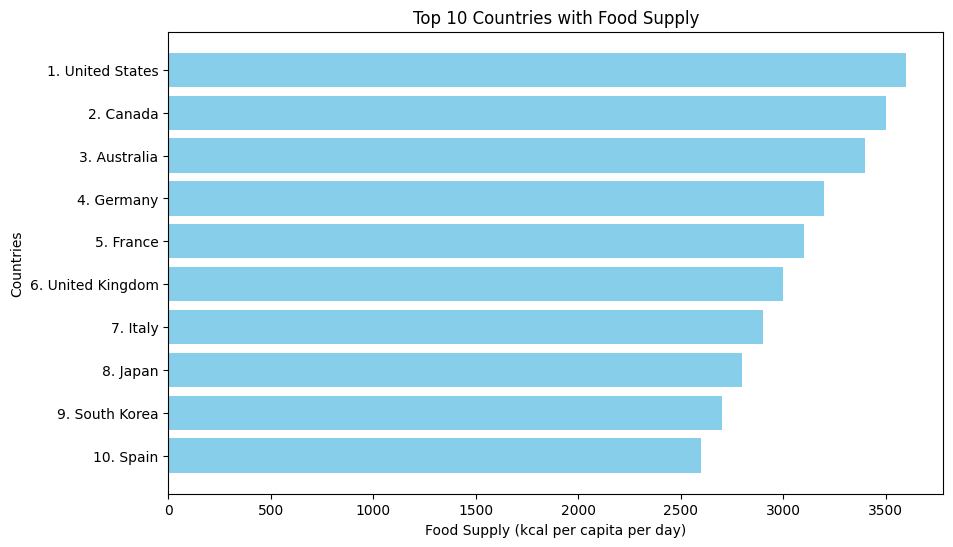

In [131]:
def plot_insights(data):
    countries = [entry.split(" - ")[0] for entry in data]
    kcal_values = [int(entry.split(" - ")[1].replace(" kcal per capita per day", "").replace(",", "")) for entry in data]

    plt.figure(figsize=(10, 6))
    plt.barh(countries, kcal_values, color='skyblue')
    plt.xlabel('Food Supply (kcal per capita per day)')
    plt.ylabel('Countries')
    plt.title('Top 10 Countries with Food Supply')
    plt.gca().invert_yaxis()
    plt.show()
data = insights.split("\n")
plot_insights(data)

In [132]:
prompt = "how much Food supply (kcal per capita) has increased ove the time period of 1961 to 2021 "

response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{ "role": "user", "content": prompt}],
      temperature=0.0,
  )

insights = response.choices[0].message.content
print(insights)

The global food supply (kcal per capita) has increased significantly over the time period of 1961 to 2021. According to data from the Food and Agriculture Organization (FAO) of the United Nations, the average food supply per capita has increased from around 2,200 kcal per capita per day in 1961 to over 2,900 kcal per capita per day in 2021. This represents an increase of approximately 32% over the past 60 years. This increase in food supply has been driven by improvements in agricultural productivity, advancements in food distribution and storage systems, and changes in dietary patterns.
